In [1]:
import cv2
import os
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
import pickle
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import tkinter as tk
import threading
import mysql.connector
from datetime import datetime
import time
from mtcnn import MTCNN
import webbrowser

In [17]:
#code to detect the faces from the image dataset

#path to the folder containing the image dataset
imageDatasetFolder = './image'

#pathe to the folder where the images with only faces will be stored
imageFaceFolder = './Face_Images'

#create folder if folder for faces doesn't exist
if not os.path.exists(imageFaceFolder):
    os.makedirs(imageFaceFolder)
    
#file reuqired for detection of face
faceDetectionFile = './haarcascade_frontalface_default.xml'

# Create the face cascade classifier
faceDetection = cv2.CascadeClassifier(faceDetectionFile)

# Loop to loop through all the images present in the folder
for imageFile in os.listdir(imageDatasetFolder):
    pathOfImage = os.path.join(imageDatasetFolder, imageFile)
    imageFound = cv2.imread(pathOfImage)

    # converting the image file to gray scale
    grayScaleImage = cv2.cvtColor(imageFound, cv2.COLOR_BGR2GRAY)

    # face detection in the image
    faceDetected = faceDetection.detectMultiScale(grayScaleImage, scaleFactor=1.1, minNeighbors=5)

    # condition if face is detected in an image
    if len(faceDetected) > 0:
        # get the coordinates of the first image detected
        (x, y, w, h) = faceDetected[0]

        # get the cropped face portion of image
        faceOfImage = imageFound[y:y+h, x:x+w]

        # generating file name for each face image as its original image
        faceFileName = os.path.splitext(imageFile)[0] + '.jpg'
        pathofFaceImages = os.path.join(imageFaceFolder, faceFileName)

        # saving the image in the respective folder
        cv2.imwrite(pathofFaceImages, faceOfImage)

        print(f"Face from the image extracted and saved: {faceFileName}")
    else:
        print(f"Face not detected in {imageFile}")

Face from the image extracted and saved: me.jpg
Face from the image extracted and saved: Saurab.jpg
Face from the image extracted and saved: Student16.jpg
Face from the image extracted and saved: Student20.jpg
Face from the image extracted and saved: Student24.jpg
Face from the image extracted and saved: Student29.jpg
Face from the image extracted and saved: Student40.jpg
Face from the image extracted and saved: Student8.jpg


In [6]:
#code to augment the face images extracted

# path to the folder that contains the face images
faceImageFolder = './Face_images'

# Path to the folder where the augmneted images will be saved
augmentedFaceImageFolder = './Aug_images'

#create folder if folder for augmented images doesn't exist
if not os.path.exists(augmentedFaceImageFolder):
    os.makedirs(augmentedFaceImageFolder)

# define the size of image and the number of it to be generated
sizeOfImage = (64, 64)
numAugmentedImages = 150

# Data augmentation techniques
augmentationOfImages = tf.keras.Sequential([
    #augment image with random flip
    tf.keras.layers.RandomFlip("horizontal"),
    #augment image with random zoom
    tf.keras.layers.RandomZoom(0.2, 0.2),
    #augment image with random rotation
    tf.keras.layers.RandomRotation(0.3),
    #augment image with random contrast
    tf.keras.layers.RandomContrast(0.4),
    #augment image with random translation
    tf.keras.layers.RandomTranslation(0.1, 0.1),
    #augment image with random brightness
    tf.keras.layers.RandomBrightness(0.4),
    #augment image with random height
    tf.keras.layers.RandomHeight(0.2),
    #augment image with random width
    tf.keras.layers.RandomWidth(0.2),
    #augment image with random flip
    tf.keras.layers.Rescaling(1./255),
])

#store the face image path of each the image in the folder
pathsOfImage = [os.path.join(faceImageFolder, nameofImage) for nameofImage in os.listdir(faceImageFolder)]

#store the name of each of the image in the folder
namesOfImage =  [os.path.splitext(nameofImage)[0] for nameofImage in os.listdir(faceImageFolder)]

#store each of the face image from the folder
imagesOfFaces = [tf.keras.preprocessing.image.load_img(pathOfImage, target_size = sizeOfImage) for pathOfImage in pathsOfImage]

# Data augmentation on each of the images stored and saved to respective folders
for i, oneImage in enumerate(imagesOfFaces):
    
    #store the augmented images of each original image in different folder
    originalImageAugmentedFolder = os.path.join(augmentedFaceImageFolder, namesOfImage[i])
    os.makedirs(originalImageAugmentedFolder, exist_ok=True)
    
    #augment each original image for the designated amount of number
    for j in range(numAugmentedImages):
        imageAugmented = augmentationOfImages(tf.keras.preprocessing.image.img_to_array(oneImage))
        
        #unique file name for each augmented image
        nameOfAugmentedImage = namesOfImage[i] + f"_{j}.jpg"
        
        #get the path for the file to be saved and save the file
        pathOfFile = os.path.join(originalImageAugmentedFolder, nameOfAugmentedImage)
        tf.keras.preprocessing.image.save_img(pathOfFile, imageAugmented)
        
        #check saved augmented image
        print(f"Saved augmented image : {nameOfAugmentedImage}")

Saved augmented image : me_0.jpg
Saved augmented image : me_1.jpg
Saved augmented image : me_2.jpg
Saved augmented image : me_3.jpg
Saved augmented image : me_4.jpg
Saved augmented image : me_5.jpg
Saved augmented image : me_6.jpg
Saved augmented image : me_7.jpg
Saved augmented image : me_8.jpg
Saved augmented image : me_9.jpg
Saved augmented image : me_10.jpg
Saved augmented image : me_11.jpg
Saved augmented image : me_12.jpg
Saved augmented image : me_13.jpg
Saved augmented image : me_14.jpg
Saved augmented image : me_15.jpg
Saved augmented image : me_16.jpg
Saved augmented image : me_17.jpg
Saved augmented image : me_18.jpg
Saved augmented image : me_19.jpg
Saved augmented image : me_20.jpg
Saved augmented image : me_21.jpg
Saved augmented image : me_22.jpg
Saved augmented image : me_23.jpg
Saved augmented image : me_24.jpg
Saved augmented image : me_25.jpg
Saved augmented image : me_26.jpg
Saved augmented image : me_27.jpg
Saved augmented image : me_28.jpg
Saved augmented image : 

Saved augmented image : Saurab_81.jpg
Saved augmented image : Saurab_82.jpg
Saved augmented image : Saurab_83.jpg
Saved augmented image : Saurab_84.jpg
Saved augmented image : Saurab_85.jpg
Saved augmented image : Saurab_86.jpg
Saved augmented image : Saurab_87.jpg
Saved augmented image : Saurab_88.jpg
Saved augmented image : Saurab_89.jpg
Saved augmented image : Saurab_90.jpg
Saved augmented image : Saurab_91.jpg
Saved augmented image : Saurab_92.jpg
Saved augmented image : Saurab_93.jpg
Saved augmented image : Saurab_94.jpg
Saved augmented image : Saurab_95.jpg
Saved augmented image : Saurab_96.jpg
Saved augmented image : Saurab_97.jpg
Saved augmented image : Saurab_98.jpg
Saved augmented image : Saurab_99.jpg
Saved augmented image : Saurab_100.jpg
Saved augmented image : Saurab_101.jpg
Saved augmented image : Saurab_102.jpg
Saved augmented image : Saurab_103.jpg
Saved augmented image : Saurab_104.jpg
Saved augmented image : Saurab_105.jpg
Saved augmented image : Saurab_106.jpg
Saved

Saved augmented image : Student16_138.jpg
Saved augmented image : Student16_139.jpg
Saved augmented image : Student16_140.jpg
Saved augmented image : Student16_141.jpg
Saved augmented image : Student16_142.jpg
Saved augmented image : Student16_143.jpg
Saved augmented image : Student16_144.jpg
Saved augmented image : Student16_145.jpg
Saved augmented image : Student16_146.jpg
Saved augmented image : Student16_147.jpg
Saved augmented image : Student16_148.jpg
Saved augmented image : Student16_149.jpg
Saved augmented image : Student20_0.jpg
Saved augmented image : Student20_1.jpg
Saved augmented image : Student20_2.jpg
Saved augmented image : Student20_3.jpg
Saved augmented image : Student20_4.jpg
Saved augmented image : Student20_5.jpg
Saved augmented image : Student20_6.jpg
Saved augmented image : Student20_7.jpg
Saved augmented image : Student20_8.jpg
Saved augmented image : Student20_9.jpg
Saved augmented image : Student20_10.jpg
Saved augmented image : Student20_11.jpg
Saved augmente

Saved augmented image : Student24_40.jpg
Saved augmented image : Student24_41.jpg
Saved augmented image : Student24_42.jpg
Saved augmented image : Student24_43.jpg
Saved augmented image : Student24_44.jpg
Saved augmented image : Student24_45.jpg
Saved augmented image : Student24_46.jpg
Saved augmented image : Student24_47.jpg
Saved augmented image : Student24_48.jpg
Saved augmented image : Student24_49.jpg
Saved augmented image : Student24_50.jpg
Saved augmented image : Student24_51.jpg
Saved augmented image : Student24_52.jpg
Saved augmented image : Student24_53.jpg
Saved augmented image : Student24_54.jpg
Saved augmented image : Student24_55.jpg
Saved augmented image : Student24_56.jpg
Saved augmented image : Student24_57.jpg
Saved augmented image : Student24_58.jpg
Saved augmented image : Student24_59.jpg
Saved augmented image : Student24_60.jpg
Saved augmented image : Student24_61.jpg
Saved augmented image : Student24_62.jpg
Saved augmented image : Student24_63.jpg
Saved augmented 

Saved augmented image : Student29_92.jpg
Saved augmented image : Student29_93.jpg
Saved augmented image : Student29_94.jpg
Saved augmented image : Student29_95.jpg
Saved augmented image : Student29_96.jpg
Saved augmented image : Student29_97.jpg
Saved augmented image : Student29_98.jpg
Saved augmented image : Student29_99.jpg
Saved augmented image : Student29_100.jpg
Saved augmented image : Student29_101.jpg
Saved augmented image : Student29_102.jpg
Saved augmented image : Student29_103.jpg
Saved augmented image : Student29_104.jpg
Saved augmented image : Student29_105.jpg
Saved augmented image : Student29_106.jpg
Saved augmented image : Student29_107.jpg
Saved augmented image : Student29_108.jpg
Saved augmented image : Student29_109.jpg
Saved augmented image : Student29_110.jpg
Saved augmented image : Student29_111.jpg
Saved augmented image : Student29_112.jpg
Saved augmented image : Student29_113.jpg
Saved augmented image : Student29_114.jpg
Saved augmented image : Student29_115.jpg


Saved augmented image : Student40_142.jpg
Saved augmented image : Student40_143.jpg
Saved augmented image : Student40_144.jpg
Saved augmented image : Student40_145.jpg
Saved augmented image : Student40_146.jpg
Saved augmented image : Student40_147.jpg
Saved augmented image : Student40_148.jpg
Saved augmented image : Student40_149.jpg
Saved augmented image : Student8_0.jpg
Saved augmented image : Student8_1.jpg
Saved augmented image : Student8_2.jpg
Saved augmented image : Student8_3.jpg
Saved augmented image : Student8_4.jpg
Saved augmented image : Student8_5.jpg
Saved augmented image : Student8_6.jpg
Saved augmented image : Student8_7.jpg
Saved augmented image : Student8_8.jpg
Saved augmented image : Student8_9.jpg
Saved augmented image : Student8_10.jpg
Saved augmented image : Student8_11.jpg
Saved augmented image : Student8_12.jpg
Saved augmented image : Student8_13.jpg
Saved augmented image : Student8_14.jpg
Saved augmented image : Student8_15.jpg
Saved augmented image : Student8_1

In [24]:
#code to split the dataset into train and validation for training purpose

# path to the folder that contains the dataset, in this case the augmneted images
datasetFolder = './Aug_images'

# set the image size and batch size for training
trainImageSize = (64, 64)
batchSize = 20

# load the dataset for training set
trainDataset = tf.keras.preprocessing.image_dataset_from_directory(
    datasetFolder,
    validation_split=0.20,
    subset='training',
    seed=123,
    image_size = trainImageSize,
    batch_size = batchSize,
)

valDataset = tf.keras.preprocessing.image_dataset_from_directory(
    datasetFolder,
    validation_split=0.20,
    subset='validation',
    seed=123,
    image_size = trainImageSize,
    batch_size = batchSize,
)

#get the number of classes in training set
numberOfClasses = len(trainDataset.class_names)

#get the names of the classes in training set
namesOfClasses = trainDataset.class_names

# rescaling layer definition
rescaleSet = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)

# rescaling the training dataset
trainDataset = trainDataset.map(lambda x, y: (rescaleSet(x), y))

# rescaling the validation dataset
valDataset = valDataset.map(lambda x, y: (rescaleSet(x), y))

Found 1200 files belonging to 8 classes.
Using 960 files for training.
Found 1200 files belonging to 8 classes.
Using 240 files for validation.


In [21]:
#code for developing a model to train data using CNN

# use of model architecture
trainModel = Sequential()

# Add convolutional layers

#two convolution layers first with 16 and 64 filters
trainModel.add(Conv2D(16, (3, 3), activation='relu', input_shape=(64, 64, 3)))
trainModel.add(Conv2D(64, (3, 3), activation='relu'))

#maxpooling with a matrix of 2*2
trainModel.add(MaxPooling2D((2, 2)))

#convolution layer with 128 filters
trainModel.add(Conv2D(128, (3, 3), activation='relu'))

#maxpooling with a matrix of 2*2
trainModel.add(MaxPooling2D((2, 2)))

#two convolution layers with 128 and 256 filter
trainModel.add(Conv2D(128, (3, 3), activation='relu'))
trainModel.add(Conv2D(256, (3, 3), activation='relu'))

#maxpooling with a matrix of 2*2
trainModel.add(MaxPooling2D((2, 2)))

# flattening the feature maps
trainModel.add(Flatten())

# dense to add fully connected layers
trainModel.add(Dense(128, activation='relu'))

#dense with number of classes of layers 
trainModel.add(Dense(numberOfClasses, activation='softmax')) 

# Compilation of the model
trainModel.compile(optimizer='RMSprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# getting the summary of the model and view the layers
trainModel.summary()

#get the total number of layers used
print(len(trainModel.layers))

#train the dataset with the model developed
trainResult = trainModel.fit(trainDataset,
                         epochs = 15,
                         validation_data = valDataset)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 62, 62, 16)        448       
                                                                 
 conv2d_16 (Conv2D)          (None, 60, 60, 64)        9280      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_17 (Conv2D)          (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 14, 14, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 12, 12, 128)      

In [22]:
# trainModel.save('./attendance_model.h5');
trainModel.save('./model_train.h5');

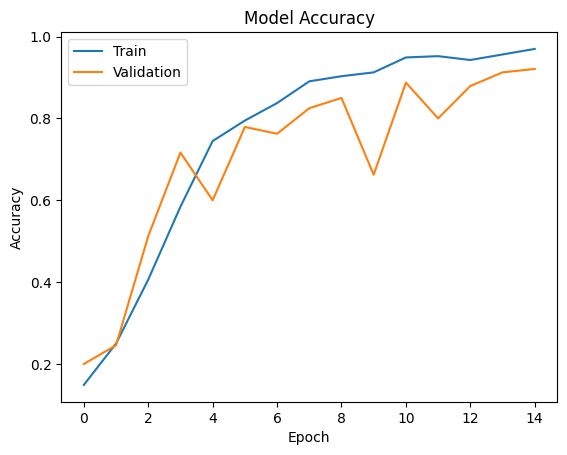

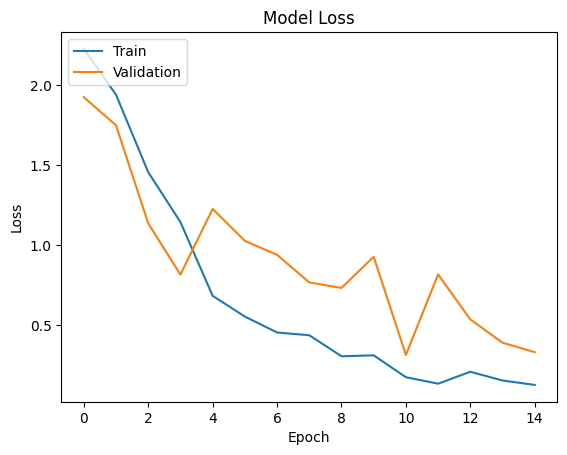

In [23]:
#code to plot the result of the training

# training and validation accuracy graph
plt.plot(trainResult.history['accuracy'])
plt.plot(trainResult.history['val_accuracy'])

#title of the grapgh
plt.title('Model Accuracy')

#x and y label of the graph
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

#legend of the graph
plt.legend(['Train', 'Validation'], loc='upper left')

#displaying the graph
plt.show()

# training and validation loss graph
plt.plot(trainResult.history['loss'])
plt.plot(trainResult.history['val_loss'])

#title of the grapgh
plt.title('Model Loss')

#x and y label of the graph
plt.xlabel('Epoch')
plt.ylabel('Loss')

#legend of the graph
plt.legend(['Train', 'Validation'], loc='upper left')

#displaying the graph
plt.show()

In [7]:
#get the labels/class names from the training dataset with index
getTheClassList = {i: namesOfClasses[i] for i in range(len(namesOfClasses))}
print(getTheClassList)

# store the labels in a file in the current folder
labelFileName = 'names.pickle'
with open(labelFileName, 'wb') as faceLabel:
    pickle.dump(getTheClassList, faceLabel)

{0: 'Saurab', 1: 'Student16', 2: 'Student20', 3: 'Student24', 4: 'Student29', 5: 'Student40', 6: 'Student8', 7: 'me'}


In [25]:
# get labels from the pickle file stored in the folder
fileNameLabel = './names.pickle'
with open(fileNameLabel, "rb") as f:
    listOfLabels = pickle.load(f)

#store the class names obtained from the pickle file
listOfClassNames = [value for _, value in listOfLabels.items()]
print(listOfClassNames)

['Saurab', 'Student16', 'Student20', 'Student24', 'Student29', 'Student40', 'Student8', 'me']


In [22]:
#code to test the model with original/test images

# folder containing the images to be tested
testImagesFolder = './image'

# saved model path
pathOfModel = './attendance_model.h5'

# get the saved model from its path
recognitionModel = load_model(pathOfModel)

# get the list of the predictions
getPredictions = []

# get the path of the file for face detection
pathOfCascadeFile = './haarcascade_frontalface_default.xml'

# get the cascade classifier for face detection
detectionCascadeFile = cv2.CascadeClassifier(pathOfCascadeFile)

# counters to calculate the total faces tested and correct predictions
numberOfFacesTested = 0
facePredictionsCorrect = 0

# loop through all the test images in the folder
for testImageFile in os.listdir(testImagesFolder):
    
    #get the path of the image
    image_path = os.path.join(testImagesFolder, testImageFile)
    
    # Load the test image
    imageForTest = cv2.imread(image_path)
    
    # converting the image file to gray scale
    grayScaleImage = cv2.cvtColor(imageForTest, cv2.COLOR_BGR2GRAY)
    
    # face detection in the image
    testFaceDetected = detectionCascadeFile.detectMultiScale(grayScaleImage, scaleFactor=1.1, minNeighbors=5)
    
    # check if a face is detected
    if len(testFaceDetected) > 0:
        # increment the counter as a face is detected
        numberOfFacesTested += 1
        
        # get the coordinated of the first detected image only
        (x, y, w, h) = testFaceDetected[0]
        
        # get the cropped face portion of image
        faceFromImageTest = imageForTest[y:y+h, x:x+w]
        
        # Preprocess the face image
        imageOfFace = cv2.resize(faceFromImageTest, (64, 64))  #resize the image to 64*64
        imageOfFace = np.expand_dims(imageOfFace, axis=0)
        imageOfFace = preprocess_input(imageOfFace)
        
        # Make prediction on the face image
        predictionOfImage = recognitionModel.predict(imageOfFace)
        
        #get the index of predicted label
        predictedLabel = np.argmax(predictionOfImage)
        
        #append the predicted label to the counter
        getPredictions.append(predictedLabel)
        
        #display the details of the prediction
        print(f"Image Name: {testImageFile}, Predicted Class: {predictedLabel}, Predicted label : {listOfClassNames[predictedLabel]}")
        
        # if the predicted label matches the image, increment the counter for correct prediction
        if listOfClassNames[predictedLabel] == os.path.splitext(testImageFile)[0]:
            facePredictionsCorrect += 1

# calculate the accuracy of the predictions
accuracyOfPrediction = facePredictionsCorrect / numberOfFacesTested * 100

#display the total number of faces in prediction
print(f"Total Faces: {numberOfFacesTested}")

#display the total number of correct prediction
print(f"Correct Predictions: {facePredictionsCorrect}")

#display the accuracy of the prediction
print(f"Accuracy: {accuracyOfPrediction:.2f}%")

1/1 [==============================] - 0s 179ms/step
Image Name: me.jpg, Predicted Class: 7, Predicted label : me
1/1 [==============================] - 0s 68ms/step
Image Name: Saurab.jpg, Predicted Class: 0, Predicted label : Saurab
1/1 [==============================] - 0s 74ms/step
Image Name: Student16.JPG, Predicted Class: 1, Predicted label : Student16
1/1 [==============================] - 0s 57ms/step
Image Name: Student20.JPG, Predicted Class: 2, Predicted label : Student20
1/1 [==============================] - 0s 77ms/step
Image Name: Student24.jpg, Predicted Class: 4, Predicted label : Student29
1/1 [==============================] - 0s 73ms/step
Image Name: Student29.png, Predicted Class: 4, Predicted label : Student29
1/1 [==============================] - 0s 49ms/step
Image Name: Student40.jpg, Predicted Class: 5, Predicted label : Student40
1/1 [==============================] - 0s 50ms/step
Image Name: Student8.jpg, Predicted Class: 6, Predicted label : Student8
Total

In [34]:
#code to open user interface for face recoginition through live web cam

# path to the model
attendanceModelPath = './attendance_model.h5'

# get the saved model for face recognition
attendanceModel = load_model(attendanceModelPath)

# get the MTCNN face detector for face detection
faceDetector = MTCNN()

# creating the database connection to register attendance
dbConnection = mysql.connector.connect(
    host="localhost",
    user="root",
    password="",
    database="attendance"
)

# creating a cursor to interact with the database
dbConnectionCursor = dbConnection.cursor()

# function to initiate the face recognition process
def initiateFaceRecognition():
    # open the webcam
    captureImageWebCam = cv2.VideoCapture(0)

    # coordinates and size of the box frame to be displayed in the webcam
    box_x = 50  # x-coordinate of the box frame
    box_y = 100  # y-coordinate of the box frame
    box_width = 550  # box width
    box_height = 180  # box  height

    # place the box in the webcam as designated
    #start of the box in webcam
    startOfBox = (box_x, box_y)
    #end of the box in webcam
    endOfBox = (box_x + box_width, box_y + box_height)

    while True:
        # webcam frame capture
        ret, captureFrame = captureImageWebCam.read()

        # Draw the box region in the frame
        cv2.rectangle(captureFrame, startOfBox, endOfBox, (0, 255, 0), 2)

        # get the cropped face region as per the size of the box designated
        cropCaptureFrame = captureFrame[box_y:box_y+box_height, box_x:box_x+box_width]

        # converting the cropped frame into RGB
        cropCaptureFrameRGB = cv2.cvtColor(cropCaptureFrame, cv2.COLOR_BGR2RGB)

        # using mtcnn detect the faces from the cropped frame
        facesDetectedWebCam = faceDetector.detect_faces(cropCaptureFrameRGB)

        #path to the image recognized
        pathToTheImage = './image/'

        # loop through all the faces detected in the frame in webcam
        for singleFace in facesDetectedWebCam:
            # Extract the bounding box coordinates
            x, y, w, h = singleFace['box']
            x += box_x
            y += box_y

            # from the frame crop the face region in webcam
            faceFromFrame = captureFrame[y:y+h, x:x+w]

            # Preprocess the face image
            imageOfFaceFrame = cv2.resize(faceFromFrame, (64, 64))   #resize the image to 64*64
            imageOfFaceFrame = np.expand_dims(imageOfFaceFrame, axis=0)
            imageOfFaceFrame = preprocess_input(imageOfFaceFrame)

            # Make prediction on the face image
            facePrediction = attendanceModel.predict(imageOfFaceFrame)
            
            #get the class/label of the predicted face
            predictedFaceClass = np.argmax(facePrediction)

            # if the face is within the frame, display the predicted class name/label
            if x >= box_x and y >= box_y and x + w <= box_x + box_width and y + h <= box_y + box_height:
                classLabel = f"Class: {listOfClassNames[predictedFaceClass]}"
                
                #display the label of the face
                cv2.putText(captureFrame, classLabel, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
                
                #display a rectangle aroung the face
                cv2.rectangle(captureFrame, (x, y), (x + w, y + h), (0, 255, 0), 2)
                
                #display the label in console
                print(listOfClassNames[predictedFaceClass])

                # get a datatime object
                dateAndTime = datetime.now()
                
                #get the current date
                currentDate = dateAndTime.strftime("%Y-%m-%d")
                
                #get the current time
                currentTime = dateAndTime.strftime("%H:%M:%S")

                # insert into the database details of the recognized face
                
                #query to insert into database
                insertQuery = "INSERT INTO student_attendance (id, name, date, time, attendance) VALUES (%s, %s, %s, %s, %s)"
                
                #values to be inserted in the database
                insertValues = (int(predictedFaceClass), listOfClassNames[predictedFaceClass], currentDate, currentTime, 'Y')
                
                #try except to insert into the database
                try:
                    dbConnectionCursor.execute(insertQuery, insertValues)
                    dbConnection.commit()
                except Exception as e:
                    dbConnection.rollback()
                    print("Error in inserting into database:", e)

                # display the image of the face recognized
                pathToTheImage = pathToTheImage + listOfClassNames[predictedFaceClass] + '.jpg'
                
                #try except function to display the matched image
                try:
                    
                    #read the image from the path
                    imageMatched = cv2.imread(pathToTheImage)
                    
                    #cases where image could not be read
                    if imageMatched is None:
                        raise ValueError(f"Failed to read image: {pathToTheImage}")
                    if imageMatched.shape[0] <= 0 or imageMatched.shape[1] <= 0:
                        raise ValueError(f"Invalid image dimensions: {pathToTheImage}")

                    #resize the image to the desired size
                    imageMatched = cv2.resize(imageMatched, (400, 400))
                    
                    #wait 0.5s before showing image
                    cv2.waitKey(500)
                    
                    #display the image
                    cv2.imshow('Student matched', imageMatched)
                    
                    #wait till 3s and destroy the window displaying image
                    cv2.waitKey(3000)
                    cv2.destroyWindow('Student matched')
                except Exception as e:
                    print("Error displaying matching image:", e)

        # display the webcam frame on the screen
        cv2.imshow('Webcam', captureFrame)

        # exist the webcam if small q is pressed
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # Release the webcam and close windows
    captureImageWebCam.release()
    cv2.destroyAllWindows()
    dbConnection.close()

# function to perform face recognition
def faceRecognitionClick():
    # Create a new thread to run the face recognition
    runFunction = threading.Thread(target=initiateFaceRecognition)
    runFunction.start()

# function to open url to display attendance record
def showattendanceClick():
    
    #url that is to be opened
    destinationUrl = "http://localhost:8012/AI_attendance/index.php"
    
    #open the url in the browser
    webbrowser.open(destinationUrl)
    
# create a user interface using tkinter
userInterface = tk.Tk()

#user interface size
userInterface.geometry("1200x600")

#title of the user interface
userInterface.title("Attendance Registration")

# display the user interface frame
userInterfaceFrame = tk.Frame(userInterface)
userInterfaceFrame.pack(expand=True)

# create a title for the user interface
titleUserInterface = tk.Label(userInterfaceFrame, text="Attendance Registration System", font=("Arial", 16, "bold"))
titleUserInterface.pack(pady=20)

# create button for face recognition and display it below the title
faceRecognition = tk.Button(userInterfaceFrame, text="Initiate Face Recognition", command = faceRecognitionClick)
faceRecognition.pack(pady=40, padx=100, anchor='center')

# create button for getting to url for attendance record and display it just below face recogniton button
showattendance = tk.Button(userInterfaceFrame, text="Show students attendance", command = showattendanceClick)
showattendance.pack(pady=10, padx=100, anchor='center')

# Start the Tkinter event loop
userInterface.mainloop()


1/1 [==============================] - 0s 144ms/step
me
1/1 [==============================] - 0s 63ms/step
me
1/1 [==============================] - 0s 51ms/step
me
1/1 [==============================] - 0s 50ms/step
me
1/1 [==============================] - 0s 50ms/step
me
1/1 [==============================] - 0s 49ms/step
me
1/1 [==============================] - 0s 53ms/step
me
1/1 [==============================] - 0s 62ms/step
Student20
1/1 [==============================] - 0s 51ms/step
Student20
1/1 [==============================] - 0s 61ms/step
Student20
